In [2]:
import pandas as pd
df = pd.read_csv("wine-clustering.csv")
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(178, 13)

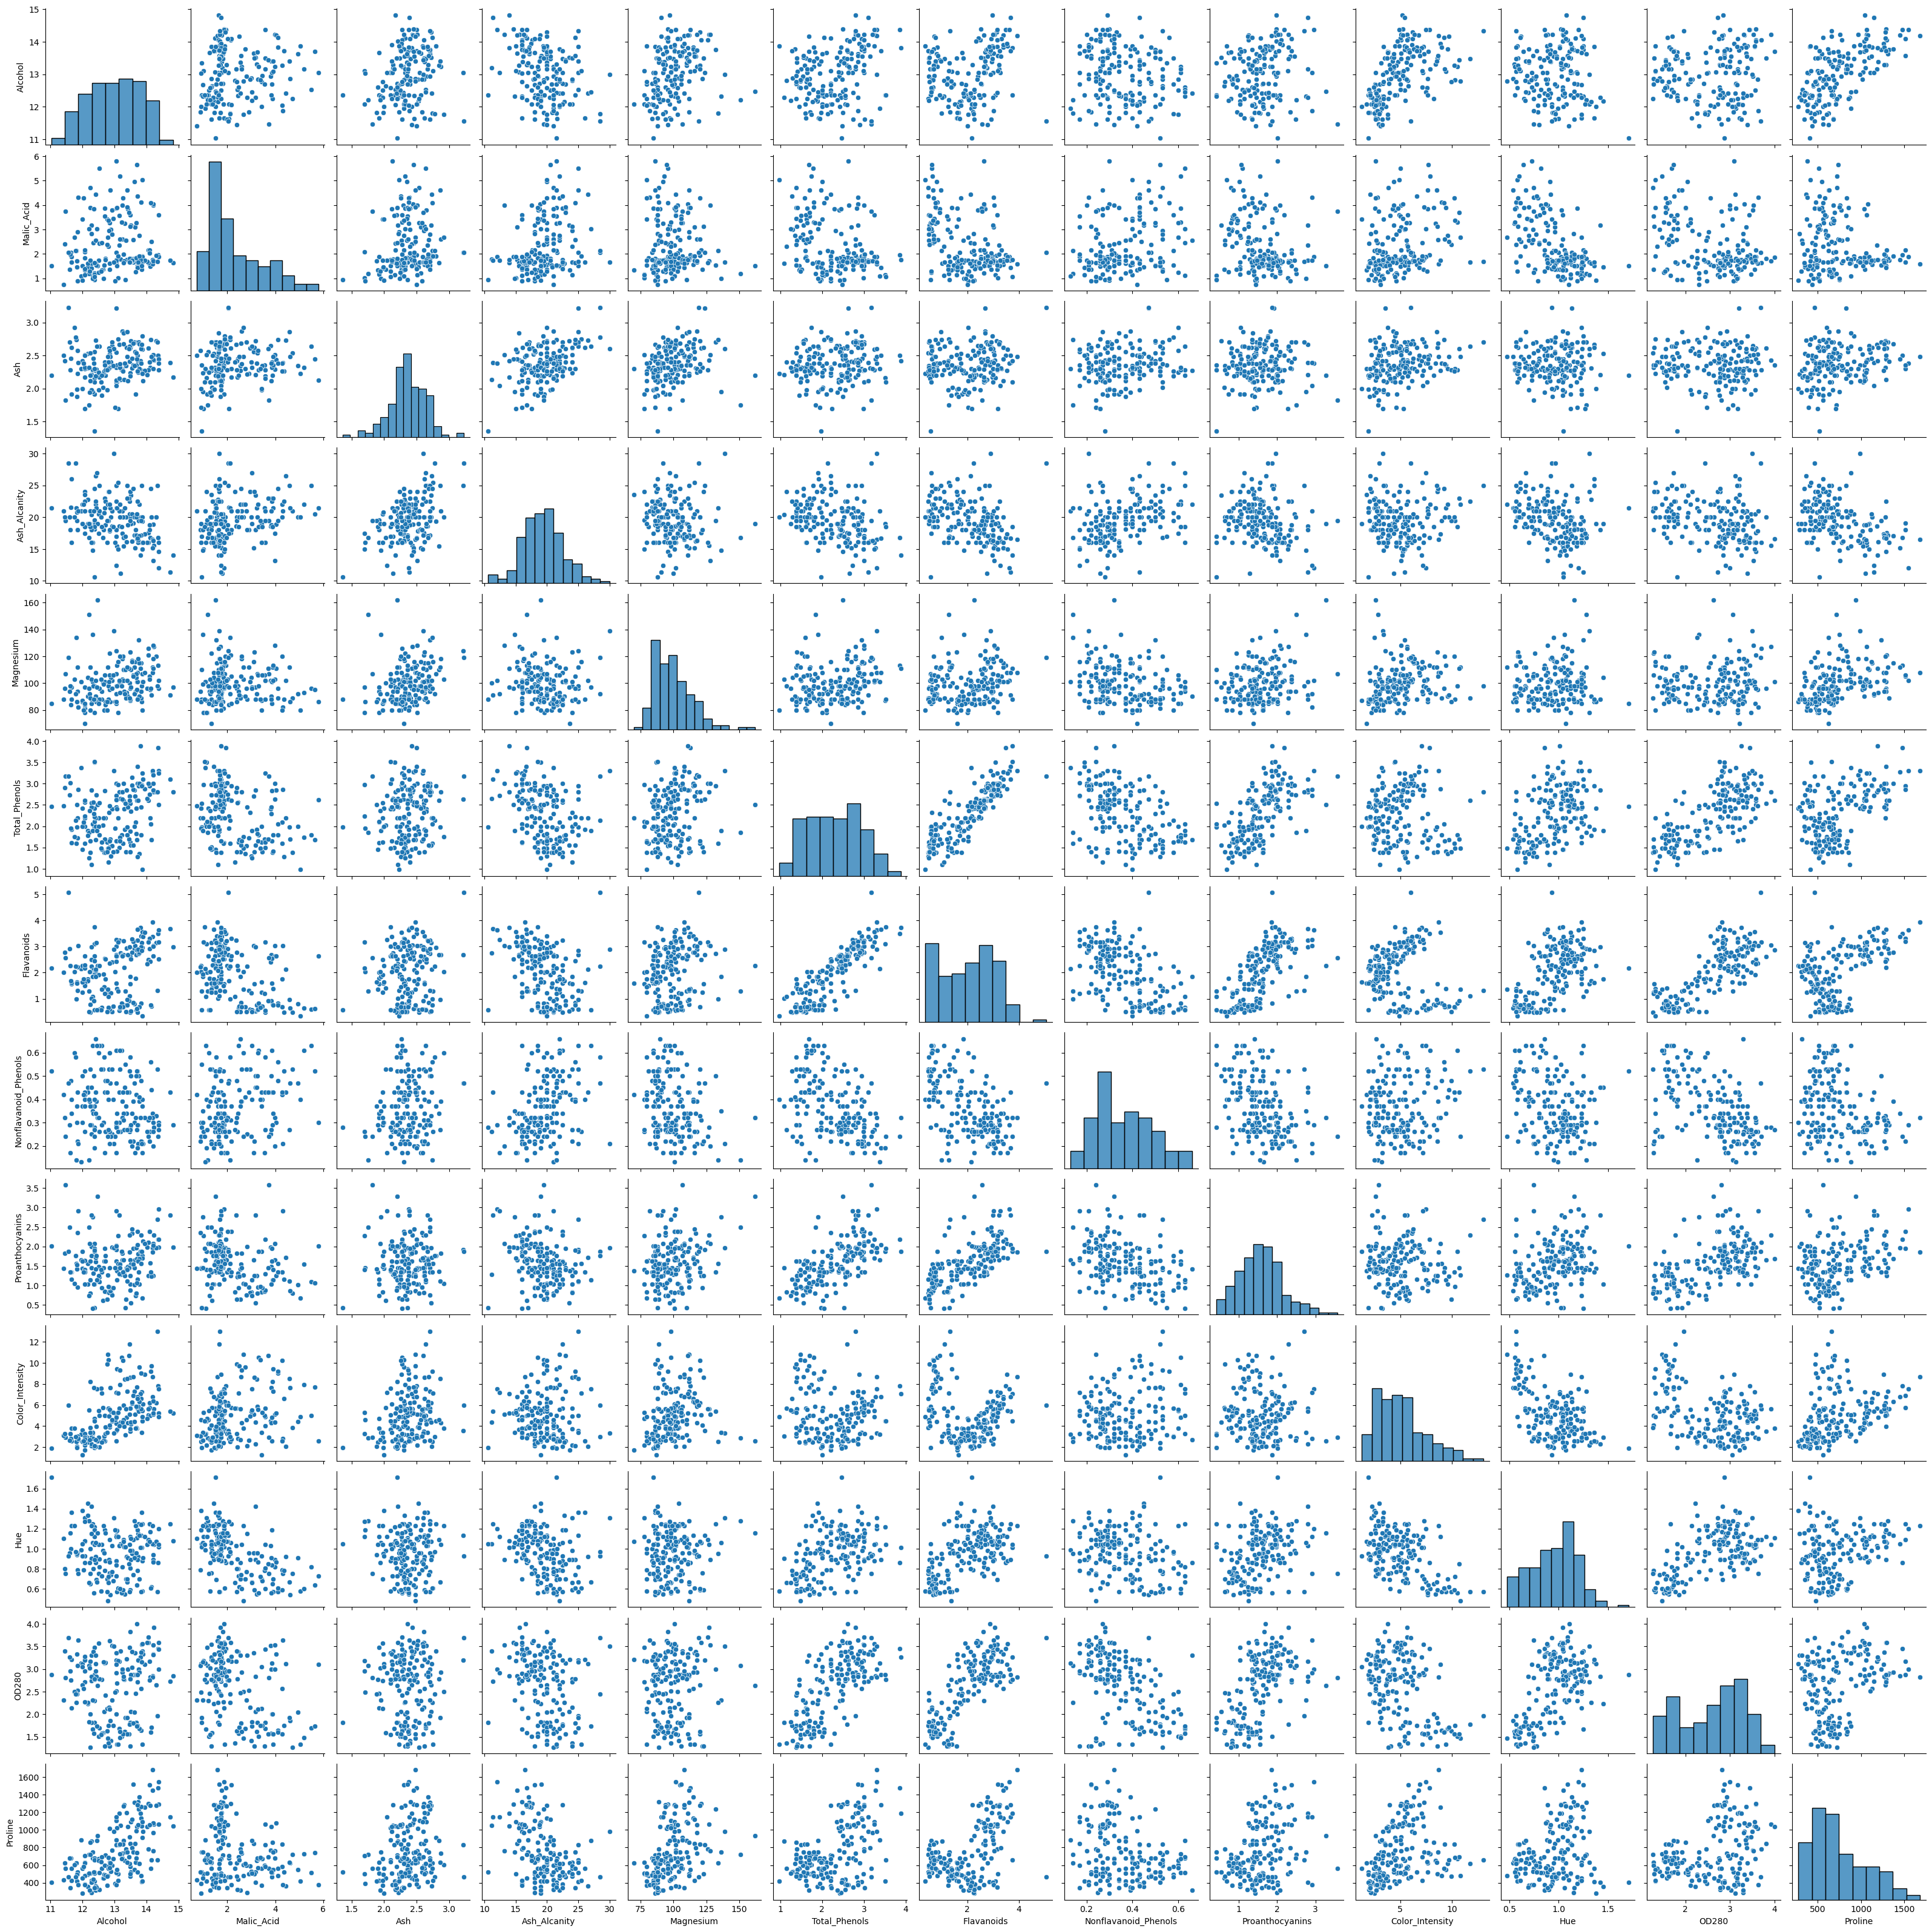

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.show()

C:\Users\dell\miniconda3\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dell\miniconda3\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dell\miniconda3\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dell\miniconda3\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: User

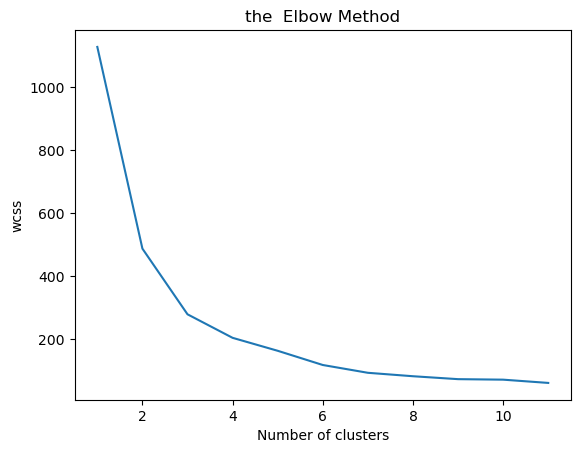

In [14]:
from sklearn.cluster import KMeans

x= df[['Color_Intensity','Flavanoids']]
wcss = []
for i in range(1,12):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,12),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.title('the  Elbow Method')
plt.show()

In [16]:
#as we now know the number of clusters = 3 from the elow graph we can use algo for
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=0)
#predict the cluster for each data point 
kmeans.fit_predict(x)

C:\Users\dell\miniconda3\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 3, 3, 3, 3, 1, 3,
       1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3,
       3, 3], dtype=int32)

In [18]:
y_predict = kmeans.fit_predict(x)
y_predict

C:\Users\dell\miniconda3\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 3, 3, 3, 3, 1, 3,
       1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3,
       3, 3], dtype=int32)

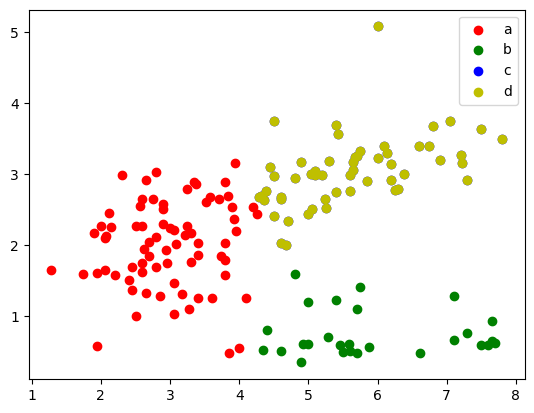

In [19]:
plt.scatter(x[y_predict==0]['Color_Intensity'],x[y_predict==0]['Flavanoids'],c='r',label = "a")
plt.scatter(x[y_predict==1]['Color_Intensity'],x[y_predict==1]['Flavanoids'],c='g',label = "b")
plt.scatter(x[y_predict==2]['Color_Intensity'],x[y_predict==2]['Flavanoids'],c='b',label = "c")
plt.scatter(x[y_predict==2]['Color_Intensity'],x[y_predict==2]['Flavanoids'],c='y',label = "d")
plt.legend()
plt.show()